### Import some libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

### Open data

We use `sklearn` to load breast cancer data. It is decomposed in a dataframe with the features values inside and in a pandas Series values of 0 and 1 as targets. 0 corresponds to a malignant cell and 1 corresponds to a benign cell. We show the first rows of the features dataframe and we show the names of each feature.

In [3]:
pd.set_option('display.max_columns', None)
breast_data = load_breast_cancer(as_frame=True)

print(breast_data.feature_names)
breast_data.data.head()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We show the names of the targets and we show the first 5 rows. First 5 rows correspond to malignant cells.

In [4]:
print(breast_data.target_names)
print(breast_data.target.head())

['malignant' 'benign']
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


### Analysis of the dataset

**Statistics for each features**

We use pandas `describe()` method to output statistics on the features and on the target dataframes.
We also print the shape of the data. We have a total of 569 observations with 30 features.

In [5]:
print("Breast features data shape:", breast_data.data.shape)
breast_data.data.describe()

Breast features data shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
print("Breast target data shape:", breast_data.target.shape)
breast_data.target.describe()

Breast target data shape: (569,)


count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

**General information about dataset**  
With pandas `info()` method, we can see some basic information about our data. We can see that there are **no missing values**
Only **float** values for the features (makes sense since they are measurements from an image)
Target values are **integers** values.

In [7]:
breast_data.data.insert(0, "Diagnosis", breast_data.target, True)
print(breast_data.data.info())
breast_data.data = breast_data.data.drop(columns=["Diagnosis"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int32  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

**Repartition of malignant and benign observations in the dataset**  
Among a total of 569 observations, 357 are benign and 212 are malignant cells.

357 are benign cells and 212 are malignant cells.


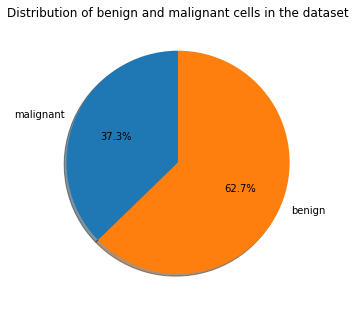

In [8]:
val = breast_data.target.value_counts()
print("{} are {} cells and {} are {} cells.".format(val[1], breast_data.target_names[1], val[0], breast_data.target_names[0]))
fig, ax = plt.subplots(figsize=(5, 10))
ax.pie([val[0], val[1]], labels=breast_data.target_names, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Distribution of benign and malignant cells in the dataset")
plt.show()

**Correlation between features and target**  
We first add diagnosis column to have correlation between the diagnosis and the features.

In [9]:
breast_data.data.insert(0, "Diagnosis", breast_data.target, True)
breast_data.data.head()

,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We compute correlation by using `corr()` pandas method.    
We can see that Diagnosis is very correlated to mean_radius, mean_perimeter, mean_area (which are correlated all 3 together), mean concave points, worst radius, worst perimeter, worst area (which are correlated all 3 together) and worst concave points.

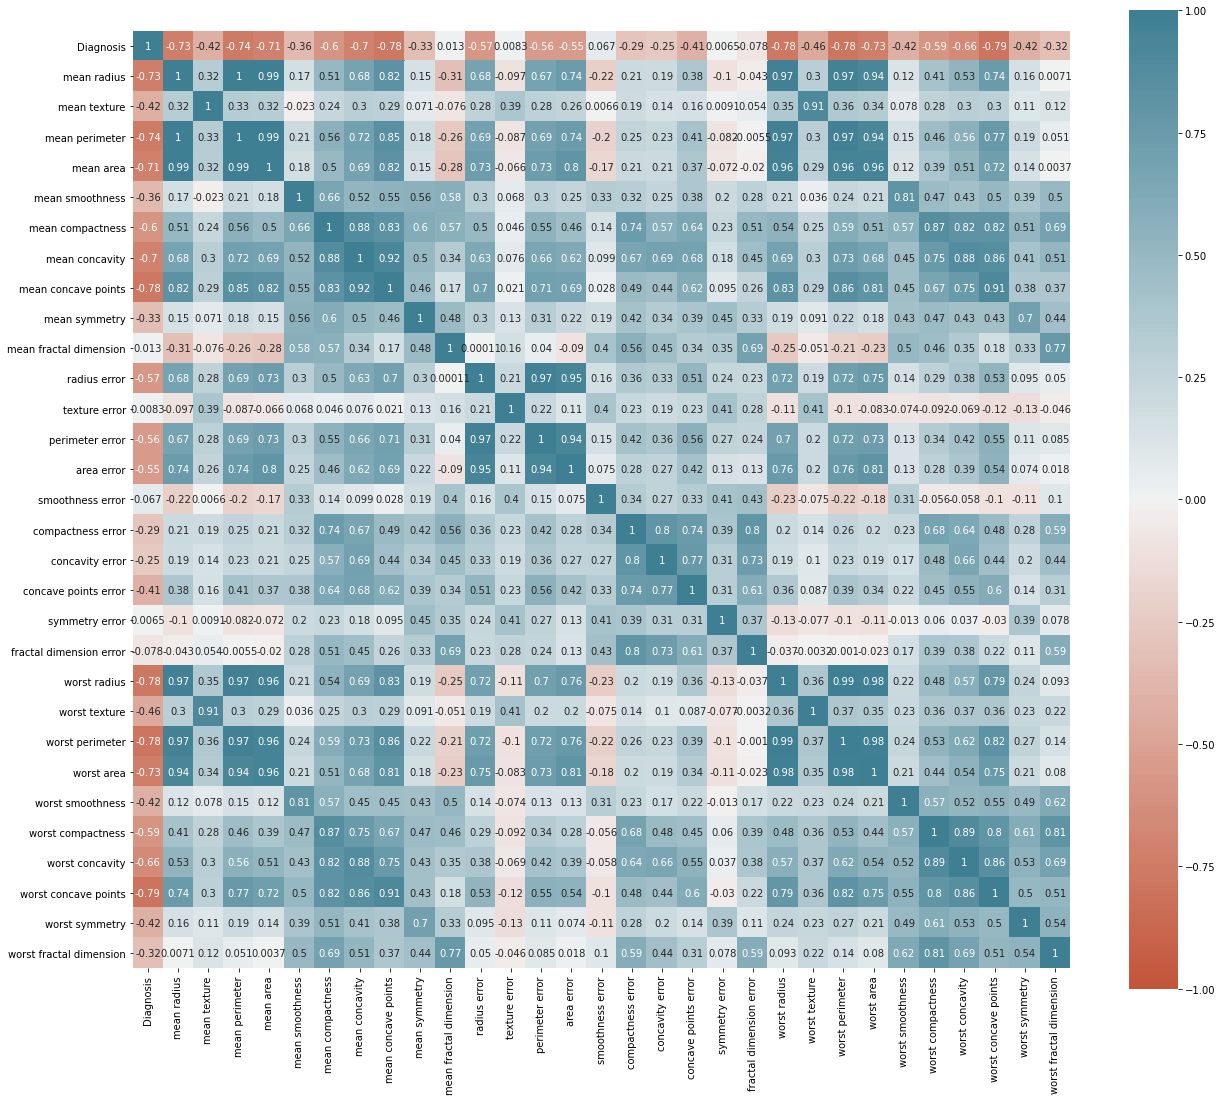

In [10]:
corr = breast_data.data.corr()
fig, ax = plt.subplots(figsize=(21, 18))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=220), square=True, annot=True)
plt.show()

**Show outliers in dataset**  
By plotting histograms, we can visualize the outliers in the data. We keep the data that way since we don't have any large outliers in the data.

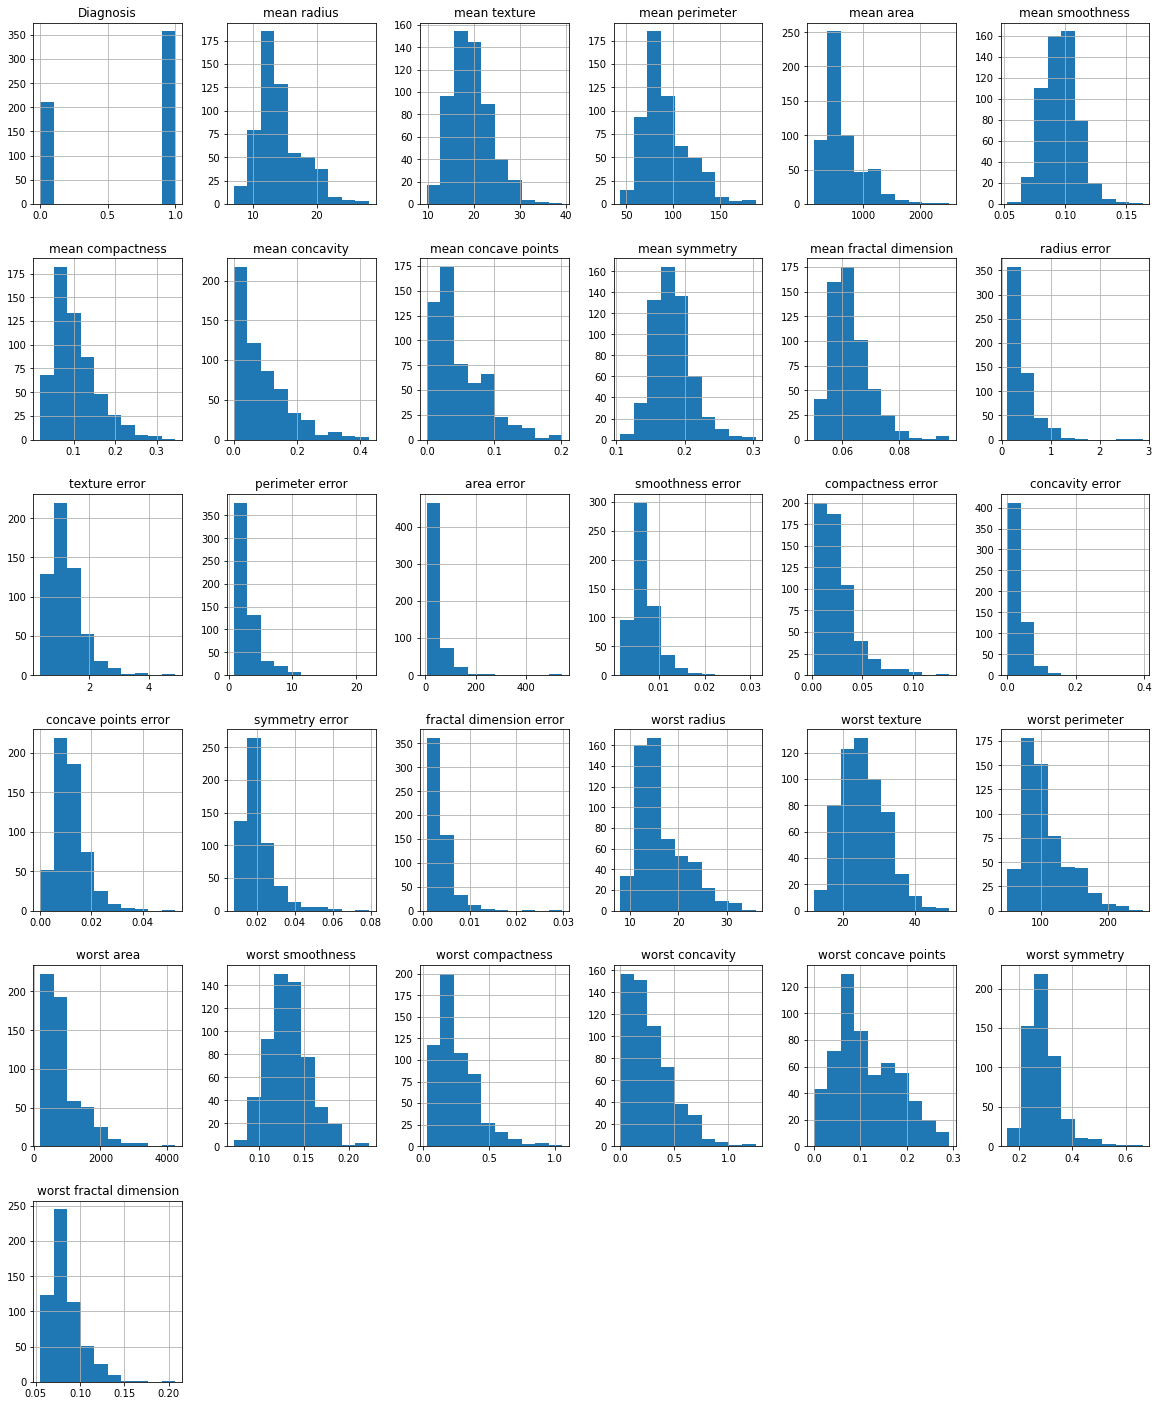

In [11]:
breast_data.data.hist(figsize=(20, 25))
plt.show()

**PCA**  
We use principal component analysis to reduce the dimensionality of the dataset in three components. We then plot the points of our data among these three components. Based on the plots, we see that the data can be linearly separable.

Dataset is reduced to three features: (569, 3)


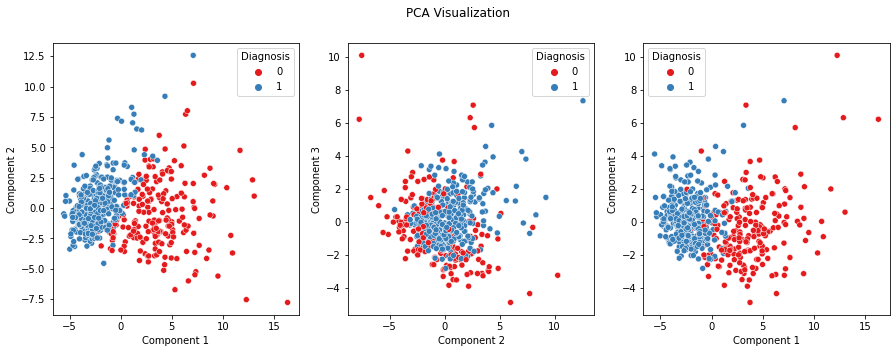

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

breast_data = load_breast_cancer()
X, y = breast_data.data, breast_data.target
scaler = StandardScaler()
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
pca = PCA(n_components=3, svd_solver='full')
pca = pca.fit(scaled_X)
X_pca = pca.transform(scaled_X)
print("Dataset is reduced to three features:", X_pca.shape)

pca_dataframe = pd.DataFrame(data=X_pca, columns=["Component 1", "Component 2","Component 3"])
pca_dataframe['Diagnosis'] = y

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('PCA Visualization')
sns.scatterplot(ax=axes[0], data=pca_dataframe, x="Component 1", y="Component 2", hue="Diagnosis", palette ='Set1')
sns.scatterplot(ax=axes[1], data=pca_dataframe, x="Component 2", y="Component 3", hue="Diagnosis", palette ='Set1')
sns.scatterplot(ax=axes[2], data=pca_dataframe, x="Component 1", y="Component 3", hue="Diagnosis", palette ='Set1')
plt.show()

### Prediction  
For this study, we compare 5 machine learning models:
- Logistic Regression
- Decision Tree
- K-Nearest Neighbors
- Random Forest
- Support Vector Machine

We first define a function to plot interesting metrics for binary classification. The function called `compute_metrics(y_true, y_pred)` takes as input the groundtruth values and the predicted values. It plots a confusion matrix of the predicted values. It returns a list of the following metrics:
- accuracy
- precision
- recall
- mean average precision
- F1 score

These metrics are presented in details in the report.

In [14]:
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score, average_precision_score, f1_score

def compute_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    mAP = average_precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("Mean average precision:", mAP)
    print("F1 score:", f1)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("GroundTruth")
    plt.show()
    return [acc, prec, rec, mAP, f1]

We load the breast cancer data. We need to bring all features to the same level of values from 0 to 1. We use `StandardScaler()`to do so. We then split the data in a *train* and *test* dataset with the method `train_test_split()` with the repartition of 80% of training data and of 20% of test data.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

breast_data = load_breast_cancer()
X, y = breast_data.data, breast_data.target
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Dataset Shapes:")
print(">>>> ", X_train.shape)
print(">>>> ", y_train.shape)
print("Test Dataset Shapes:")
print(">>>> ", X_test.shape)
print(">>>> ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print("In the test dataset, we have {} {} and {} {} observations".format(counts[0], breast_data.target_names[unique[0]], counts[1], breast_data.target_names[unique[1]]))

Training Dataset Shapes:
>>>>  (455, 30)
>>>>  (455,)
Test Dataset Shapes:
>>>>  (114, 30)
>>>>  (114,)
In the test dataset, we have 43 malignant and 71 benign observations


**Logistic Regression**

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
Mean average precision: 0.9673008813112594
F1 score: 0.979020979020979


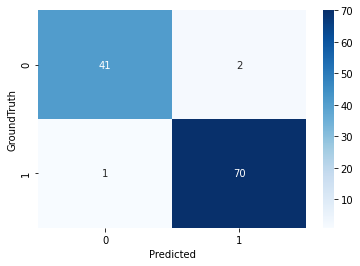

In [16]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression().fit(X_train, y_train)
pred_lreg = lreg.predict(X_test)
scores_lreg = compute_metrics(y_test, pred_lreg)

**Decision Tree**

Accuracy: 0.9385964912280702
Precision: 0.9571428571428572
Recall: 0.9436619718309859
Mean average precision: 0.9383070351936178
F1 score: 0.9503546099290779


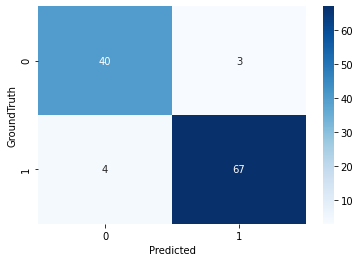

In [17]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
scores_dtc = compute_metrics(y_test, pred_dtc)

**KNN Classifier**

Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
Mean average precision: 0.9435941072677727
F1 score: 0.9577464788732394


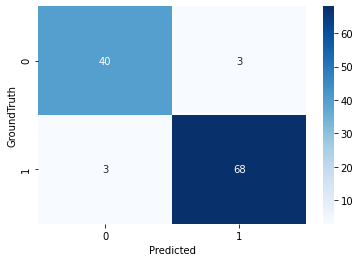

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)
pred_knn = knn.predict(X_test)
scores_knn = compute_metrics(y_test, pred_knn)

**Random Forest Classifier**

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
Mean average precision: 0.9541703477292498
F1 score: 0.9722222222222222


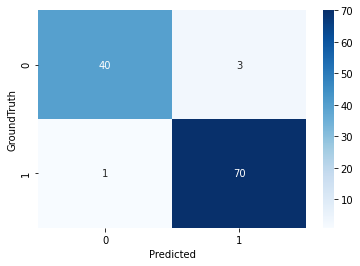

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
scores_rfc = compute_metrics(y_test, pred_rfc)

**Support Vector Machine (SVM)**

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
Mean average precision: 0.9673008813112594
F1 score: 0.979020979020979


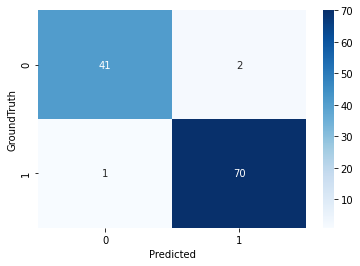

In [20]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)
pred_svc = svc.predict(X_test)
scores_svc = compute_metrics(y_test, pred_svc)

**Compare metrics between each model**  
We plot the results metrics for the 4 models in a histogram plot. We see that logistic regression is the best model.

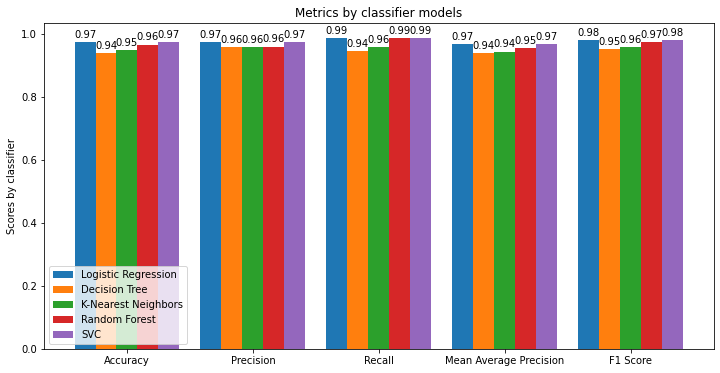

In [21]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

labels = ["Accuracy", "Precision", "Recall", "Mean Average Precision", "F1 Score"]
x = np.arange(len(labels)) * 3
width = 0.5

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 2*width, scores_lreg, width, label="Logistic Regression")
rects2 = ax.bar(x - width, scores_dtc, width, label="Decision Tree")
rects3 = ax.bar(x, scores_knn, width, label="K-Nearest Neighbors")
rects4 = ax.bar(x + width, scores_rfc, width, label="Random Forest")
rects5 = ax.bar(x + 2*width, scores_svc, width, label="SVC")
ax.set_ylabel('Scores by classifier')
ax.set_title('Metrics by classifier models')
ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

#fig.tight_layout()
ax.legend(loc='lower left')
plt.show()

**Hyper parameters fixing and cross-validation**

Logistic regression and SVC seems to be the best model. Now we compare the 5 models by finetuning hyper-parameters and by using cross-validation.
We first set up the different paramters on which we test our models. These parameters are explained in the associated report.

In [24]:
random_state = 42
classifiers = [LogisticRegression(random_state = random_state),
               DecisionTreeClassifier(random_state = random_state),
               KNeighborsClassifier(),
               RandomForestClassifier(random_state = random_state),
               SVC(random_state = random_state)]

models_name = ["Logistic Regression", "Decision Tree", "KNN", "Random Forest", "SVC"]

lr_grid = {"C":np.logspace(-3,3,7),
          "penalty":["l1","l2"],
          "max_iter": [5000, 10000],
          "solver":['newton-cg', 'liblinear', 'sag']}

dtc_grid = {"min_samples_split":range(10,500,20),
            "max_depth":range(1,20,2)}

knn_grid = {"n_neighbors":np.linspace(1,19,10, dtype = int),
           "weights":["uniform","distance"],
           "metric":["euclidean","manhattan"]}

rf_grid = {"max_features":[1,3,10],
          "min_samples_split":[2,3,10],
          "min_samples_leaf":[1,3,10],
          "bootstrap":[False],
          "n_estimators":[100,300],
          "criterion":["gini"]}

svc_grid = {"kernel":["rbf"],
           "gamma":[0.001,0.01,0.1,1],
           "C": [1,10,50,100,200,300,1000]}

classifiers_param = [lr_grid, dtc_grid, knn_grid, rf_grid, svc_grid]

We use the sklearn method `GridSearchCV` to test several parameters of a model and to get the best one. We also use `StratifieldKFold()` to do cross-validation on 10 splits. We iterate on every models.

In [25]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

classifiers_results = []
best_classifiers = []
for i in range(len(classifiers)):
    clf = GridSearchCV(classifiers[i], param_grid=classifiers_param[i], cv=StratifiedKFold(n_splits = 10),
                       scoring="accuracy", n_jobs =-1, verbose=1)
    clf.fit(X_train, y_train)
    classifiers_results.append(clf.best_score_)
    best_classifiers.append(clf.best_estimator_)
    print("Best Accuracy for model {} : {}".format(models_name[i], classifiers_results[i]))

Fitting 10 folds for each of 84 candidates, totalling 840 fits


C:\Users\Khalil\Documents\Projet_Efrei\advanced_ml\venv\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.37144928        nan 0.8989372  0.94077295 0.8989372
        nan 0.37144928        nan 0.8989372  0.94077295 0.8989372
        nan 0.91222222        nan 0.94502415 0.96700483 0.94502415
        nan 0.91222222        nan 0.94502415 0.96700483 0.94502415
        nan 0.97140097        nan 0.97357488 0.98024155 0.97357488
        nan 0.97140097        nan 0.97357488 0.98024155 0.97357488
        nan 0.97574879        nan 0.97357488 0.9757971  0.97357488
        nan 0.97574879        nan 0.97357488 0.9757971  0.97357488
        nan 0.97140097        nan 0.96922705 0.96922705 0.96922705
        nan 0.97140097        nan 0.96922705 0.96922705 0.96922705
        nan 0.96043478        nan 0.96922705 0.96922705 0.97140097
        nan 0.96043478        nan 0.96922705 0.96922705 0.97140097
        nan 0.95821256  

Best Accuracy for model Logistic Regression : 0.9802415458937197
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
Best Accuracy for model Decision Tree : 0.9385507246376813
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best Accuracy for model KNN : 0.9735265700483092
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best Accuracy for model Random Forest : 0.9691304347826086
Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best Accuracy for model SVC : 0.9735748792270531


We show the prediction results of each best models for the 5 classification models.

Model used:  LogisticRegression(C=0.1, max_iter=5000, random_state=42, solver='liblinear')
Accuracy: 0.9912280701754386
Precision: 0.9861111111111112
Recall: 1.0
Mean average precision: 0.9861111111111112
F1 score: 0.993006993006993


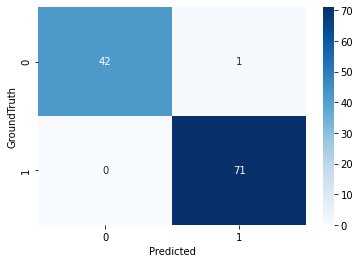

---------------------------
Model used:  DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)
Accuracy: 0.9473684210526315
Precision: 0.9452054794520548
Recall: 0.971830985915493
Mean average precision: 0.9361238326377395
F1 score: 0.9583333333333334


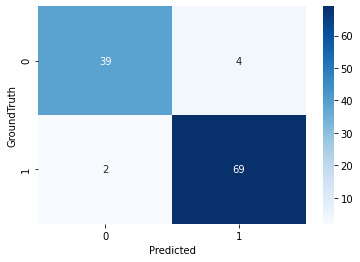

---------------------------
Model used:  KNeighborsClassifier(metric='euclidean', n_neighbors=7)
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
Mean average precision: 0.9435941072677727
F1 score: 0.9577464788732394


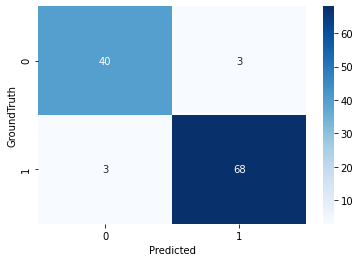

---------------------------
Model used:  RandomForestClassifier(bootstrap=False, max_features=3, min_samples_split=3,
                       random_state=42)
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
Mean average precision: 0.9541703477292498
F1 score: 0.9722222222222222


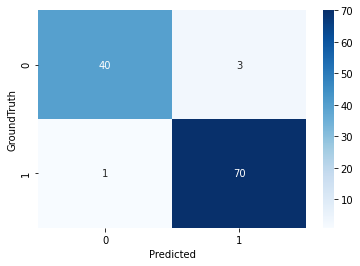

---------------------------
Model used:  SVC(C=100, gamma=0.001, random_state=42)
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
Mean average precision: 0.9726027397260274
F1 score: 0.9861111111111112


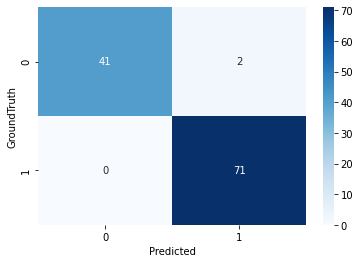

---------------------------


In [26]:
new_scores = []
for clf in best_classifiers:
    print("Model used: ", clf)
    pred = clf.predict(X_test)
    scores = compute_metrics(y_test, pred)
    new_scores.append(scores)
    print("---------------------------")

We plot the histogram of the metrics of each best model after hyper-parameters tuning and cross-validation.

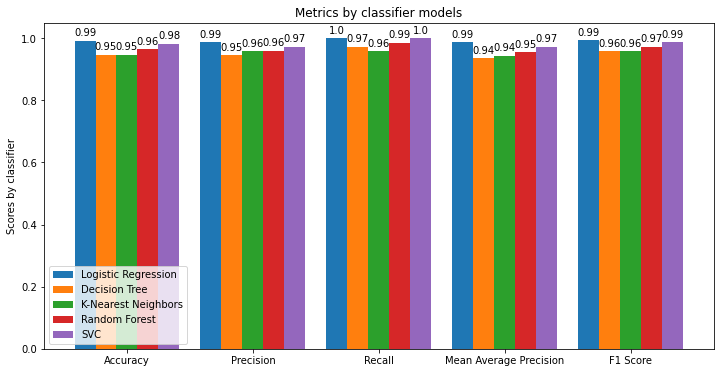

In [27]:
labels = ["Accuracy", "Precision", "Recall", "Mean Average Precision", "F1 Score"]
x = np.arange(len(labels)) * 3
width = 0.5

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 2*width, new_scores[0], width, label="Logistic Regression")
rects2 = ax.bar(x - width, new_scores[1], width, label="Decision Tree")
rects3 = ax.bar(x, new_scores[2], width, label="K-Nearest Neighbors")
rects4 = ax.bar(x + width, new_scores[3], width, label="Random Forest")
rects5 = ax.bar(x + 2*width, new_scores[4], width, label="SVC")
ax.set_ylabel('Scores by classifier')
ax.set_title('Metrics by classifier models')
ax.set_xticks(x)
ax.set_xticklabels(labels)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

#fig.tight_layout()
ax.legend(loc='lower left')
plt.show()

The best model is the logistic regression model.

### Visualization

**Visualization of logistic regression**

We visualize the results of the prediction of the selected model with a confusion matrix.

Accuracy: 0.9912280701754386
Precision: 0.9861111111111112
Recall: 1.0
Mean average precision: 0.9861111111111112
F1 score: 0.993006993006993


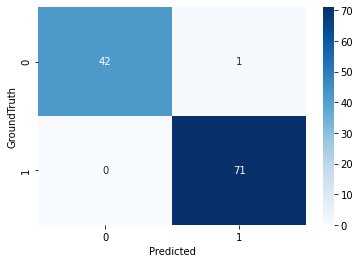

In [28]:
best_model = LogisticRegression(C=0.1, max_iter=5000, random_state=42, solver='liblinear').fit(X_train, y_train)
pred = best_model.predict(X_test)
t = compute_metrics(y_test, pred)

We show the coefficients of the best logistic regression model. It enables us to see the features that have the most impact on the model.

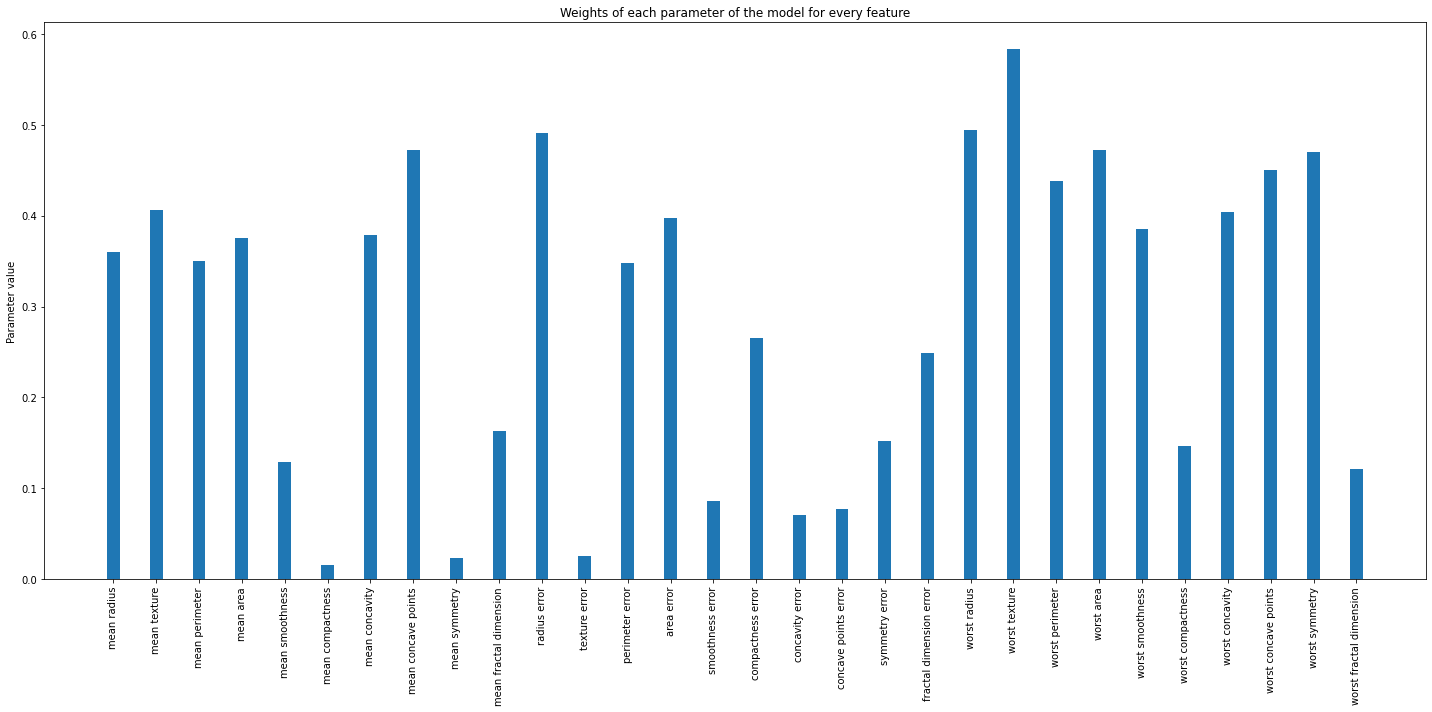

In [29]:
parameters = best_model.coef_[0].tolist()
for i in range(len(parameters)):
    parameters[i] = abs(parameters[i])

labels = breast_data.feature_names
abscisse = np.arange(len(parameters))
fig, ax = plt.subplots(figsize=(20,10))
rect = plt.bar(abscisse, parameters, 0.3)
ax.set_ylabel('Parameter value')
ax.set_title('Weights of each parameter of the model for every feature')
ax.set_xticks(abscisse)
ax.set_xticklabels(labels, rotation='vertical')
#autolabel(rect)
fig.tight_layout()
plt.show()

**Visualization of the decision tree**  
With the Python package `dtreeviz`, we show the best decision tree classifier we have found with the hyper-parameters tuning. 

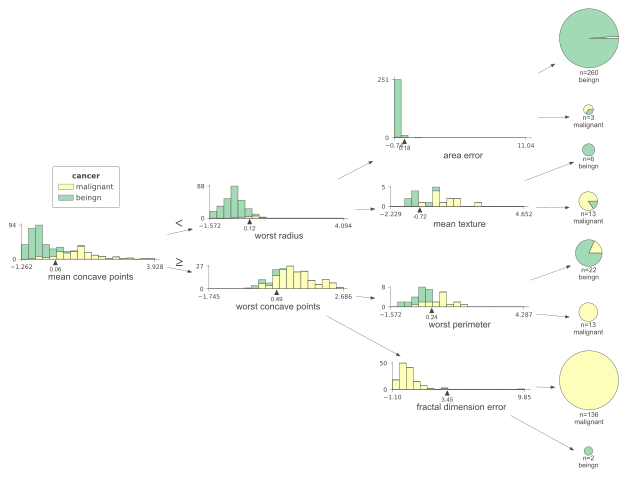

In [30]:
from dtreeviz.trees import *

dtc_best = DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)
dtc_best.fit(X_train, y_train)
dtc_viz = dtreeviz(dtc_best, 
               X_train,
               y_train,
               target_name='cancer',
               feature_names=breast_data.feature_names, 
               class_names=["malignant", "beingn"],
               orientation='LR')
dtc_viz

### Theoretical Details

Theoretical details about the selected model are presented in the report.